In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine, euclidean

In [3]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [86]:
data.shape

(23449, 19)

In [5]:
features = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']

X = data[features]

In [20]:
#Normalizing the features
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

print(X_scaled)

X_scaled[0]

[[0.76093591 0.9159853  0.91808981 ... 0.52270434 0.50967257 0.37125397]
 [0.73855544 0.81496762 0.86916162 ... 0.69929364 0.41752422 0.30867441]
 [0.68667345 0.93098792 0.90136831 ... 0.6185671  0.51790845 0.33595298]
 ...
 [0.53814852 0.82096867 0.87062842 ... 0.43995964 0.53453475 0.40114439]
 [0.63682604 0.8879804  0.90285607 ... 0.31079717 0.5346141  0.70732761]
 [0.61342828 0.8839797  0.87750141 ... 0.09021191 0.53451387 0.64907261]]


array([0.76093591, 0.9159853 , 0.91808981, 0.06350763, 0.10261569,
       0.        , 0.06556225, 0.52270434, 0.50967257, 0.37125397])

In [15]:
df = pd.DataFrame(X_scaled,columns = X.columns)

df.head()

# sns.boxplot(data=df[features], orient="h")

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.760936,0.915985,0.918090,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,0.371254
1,0.738555,0.814968,0.869162,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,0.308674
2,0.686673,0.930988,0.901368,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,0.335953
3,0.730417,0.929988,0.894118,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,0.321311
4,0.661241,0.832971,0.875385,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,0.360156


In [16]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)

IQR = Q3 - Q1

outliers = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = df[outliers].index
num_outlier = outliers.sum()

num_outlier,outliers_indices

(9609,
 Index([    8,    20,    21,    43,    44,    45,    60,    66,    67,    82,
        ...
        23428, 23430, 23432, 23434, 23435, 23437, 23441, 23443, 23447, 23448],
       dtype='int64', length=9609))

In [32]:
data2 = data.copy()

In [35]:
for feature in features:
    Q1 = data2[feature].quantile(0.25)
    Q3 = data2[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data2[feature] = data2[feature].clip(lower_bound, upper_bound)

data2

,track_id,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.06530,0.5180,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.35700,0.6930,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.11000,0.6130,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.20400,0.2770,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.08330,0.7250,123.976,189052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.06680,0.2100,128.170,204375.0
23445,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.37500,0.4000,128.041,353120.0
23446,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.15000,0.4360,127.989,210112.0
23447,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,-3.361,0.1090,0.007920,0.017400,0.34300,0.3080,128.008,355432.5


In [34]:
Q1 = data2[features].quantile(0.25)
Q3 = data2[features].quantile(0.75)

IQR = Q3 - Q1

outliers = ((data2[features] < (Q1 - 1.5 * IQR)) | (data2[features] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = data2[outliers].index
num_outlier = outliers.sum()

num_outlier,outliers_indices

(0, Index([], dtype='int64'))

In [37]:
X2 = data2[features]
X2_scaled = scaler.fit_transform(X2)

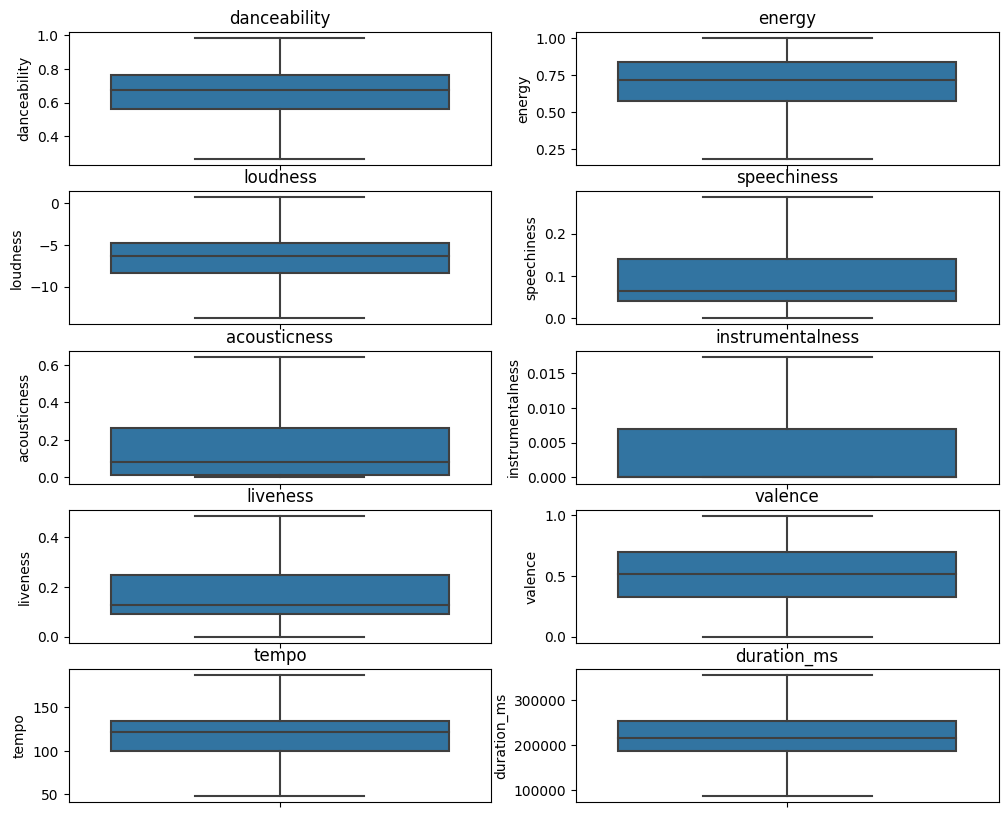

In [36]:
# Visualizing outliners by using box plots
plt.figure(figsize=(12,10))

for i,feature in enumerate(features,1):
    plt.subplot(5,2,i)
    sns.boxplot(y=data2[feature])
    plt.title(feature)

plt.show()

In [39]:
def recommend_song_cosine(song_name,data,normalize_features,n=5):
    if song_name not in data['track_name'].values:
        return 'Song not found in the song dataset'
    
    # Get index of the given song
    song_index =  data[data['track_name'] == song_name].index[0]
    input_song_features = normalize_features[song_index]

    similaritis = []

    for i in range(len(normalize_features)):
        similaritis.append((i,1-cosine(input_song_features,normalize_features[i])))

    similaritis.sort(key=lambda x:x[1], reverse=True)

    recommend_song_indices = [similaritis[i][0] for i in range(1,n+1)]

    return data['track_name'].iloc[recommend_song_indices]
   


In [90]:
print(recommend_song_cosine('Memories - Dillon Francis Remix',data,X_scaled))

13298    Hola Señorita - Robin Schulz Remix
14152                       Robarte un Beso
3466                                 Bullet
17684            Domani vedrai (feat. Gigi)
15911                 Impulso (feat. Funky)
Name: track_name, dtype: object


In [40]:
print(recommend_song_cosine('Memories - Dillon Francis Remix',data2,X2_scaled))

8878                                           Show You
15553                                     Rutte No Jave
13310                                       Night Shift
13268                                         Somewhere
3730     Gucci Rock N Rolla (feat. Rivers Cuomo & KYLE)
Name: track_name, dtype: object


In [41]:
def recommend_song_euclidean(song_name,data,normalize_features,n=5):
    if song_name not in data['track_name'].values:
        return 'Song not found in the song dataset'
    
    # Get index of the given song
    song_index =  data[data['track_name'] == song_name].index[0]
    input_song_features = normalize_features[song_index]

    distances = []

    for i in range(len(normalize_features)):
        distances.append((i,1-euclidean(input_song_features,normalize_features[i])))

    distances.sort(key=lambda x:x[1], reverse=True)

    recommend_song_indices = [distances[i][0] for i in range(1,n+1)]

    return data['track_name'].iloc[recommend_song_indices]

In [96]:
print(recommend_song_euclidean('Memories - Dillon Francis Remix',data,X_scaled))

14152                       Robarte un Beso
13298    Hola Señorita - Robin Schulz Remix
15911                 Impulso (feat. Funky)
11435                         Beverly Hills
17610                             Arrogante
Name: track_name, dtype: object


In [42]:
print(recommend_song_euclidean('Memories - Dillon Francis Remix',data2,X2_scaled))

13268                     Somewhere
13310                   Night Shift
8878                       Show You
14152               Robarte un Beso
17684    Domani vedrai (feat. Gigi)
Name: track_name, dtype: object
